Image classifier for cat-dog dataset, using CNN. <br />
Software License Agreement (GPLv3 License) <br />
Copyright (c) 2019, Amirhossein Pakdaman.

In [53]:
import keras
import keras.layers as kl
import numpy as np
import IPython

In [39]:
layers = []

In [40]:
layers.append(kl.Conv2D(32, (3, 3), input_shape = (128, 128, 3),strides=(1, 1), padding='same', activation = 'relu'))

Conv2D: creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
* 32: filter, the dimensionality of the output space.
* (3, 3): kernel_size, the height and width of the 2D convolution window.
* strides=(1, 1): An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.
* input_shape = (64, 64, 3): only when using this layer as the first layer in a model. 64x64 RGB input.
* activation = 'relu': Activation function to use.

Activations:
* softmax: Softmax activation function.
* elu: Exponential linear unit.
* selu: Scaled Exponential Linear Unit (SELU).
* softplus: Softplus activation function.
* softsign: Softsign activation function.
* relu: Rectified Linear Unit.
* tanh: Hyperbolic tangent activation function.
* sigmoid: Sigmoid activation function.
* hard_sigmoid: Hard sigmoid activation function.
* exponential: Exponential (base e) activation function.
* linear: Linear (i.e. identity) activation function.
* also Advanced Activations.

In [41]:
layers.append(kl.MaxPooling2D(pool_size = (2, 2)))

MaxPooling2D: Max pooling operation for spatial data.
* pool_size: factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension.
* strides=None: Integer, tuple of 2 integers, or None. Strides values. If None, it will default to pool_size.

Pooling layers:
* MaxPooling (1D, 2D, 3D)
* AveragePooling (1D, 2D, 3D)
* GlobalMaxPooling (1D, 2D, 3D)
* GlobalAveragePooling (1D, 2D, 3D)
* 1D: temporal data, 2D: spatial data, 3D: 3D data (spatial or spatio-temporal).

In [42]:
layers.append(kl.Conv2D(32, (3, 3),strides=(1, 1), padding='same', activation = 'relu'))

In [43]:
layers.append(kl.MaxPooling2D(pool_size = (2, 2)))

In [44]:
layers.append(kl.Flatten())

Flatten: Flattens the input. Does not affect the batch size. <br/>
ex: model.output_shape : (None, 64, 32, 32) -> (None, 65536)

In [45]:
layers.append(kl.Dense(units = 64, activation = 'relu'))

Dense: Just your regular densely-connected NN layer. <br/>
* performs: $output = activation(dot(input, kernel) + bias)$
* units: dimensionality of the output space.
* activation: Activation function to use.
* use_bias=True: whether the layer uses a bias vector.

In [46]:
layers.append(kl.Dense(units = 1, activation = 'sigmoid'))

In [47]:
net = keras.Sequential(layers)

* Sequential model is a linear stack of layers.
* Keras has two models:  Sequential and functional API. 
* The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

In [48]:
sgd = keras.optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)

Optimizers: <br/>
example for modifying parameters of the optimizer: <br/>
```python
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
```
* SGD: Stochastic gradient descent optimizer.
 * lr: Learning rate.
 * momentum: accelerates SGD in the relevant direction and dampens oscillations.
 * decay: Learning rate decay over each update.
 * nesterov: Whether to apply Nesterov momentum.
* Adam: Adam optimizer.
 * lr: Learning rate.
 * beta_1: 0 < beta < 1. Generally close to 1.
 * beta_2: 0 < beta < 1. Generally close to 1.
 * epsilon: Fuzz factor. If None, defaults to K.epsilon().
 * decay: Learning rate decay over each update.
 * amsgrad: Whether to apply the AMSGrad variant of this algorithm.
* RMSprop
* Adagrad
* Adadelta
* Adamax
* Nadam

In [49]:
net.compile(loss='binary_crossentropy', optimizer=sgd)

compile: Configures the model for training.
* optimizer: name of optimizer or optimizer instance.
* loss: name of objective function or objective function.
* metrics: List of metrics to be evaluated by the model during training and testing. Typically you will use metrics=['accuracy']. To specify different metrics for different outputs of a multi-output model, you could also pass a dictionary, such as metrics={'output_a': 'accuracy'}.
* loss_weights=None: Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.

Objective functions (Losses):
* mean_squared_error
* mean_absolute_error
* mean_absolute_percentage_error
* mean_squared_logarithmic_error
* squared_hinge
* hinge
* categorical_hinge
* logcosh
* categorical_crossentropy
* sparse_categorical_crossentropy
* binary_crossentropy
* kullback_leibler_divergence
* poisson
* cosine_proximity

In [50]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2097216   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total para

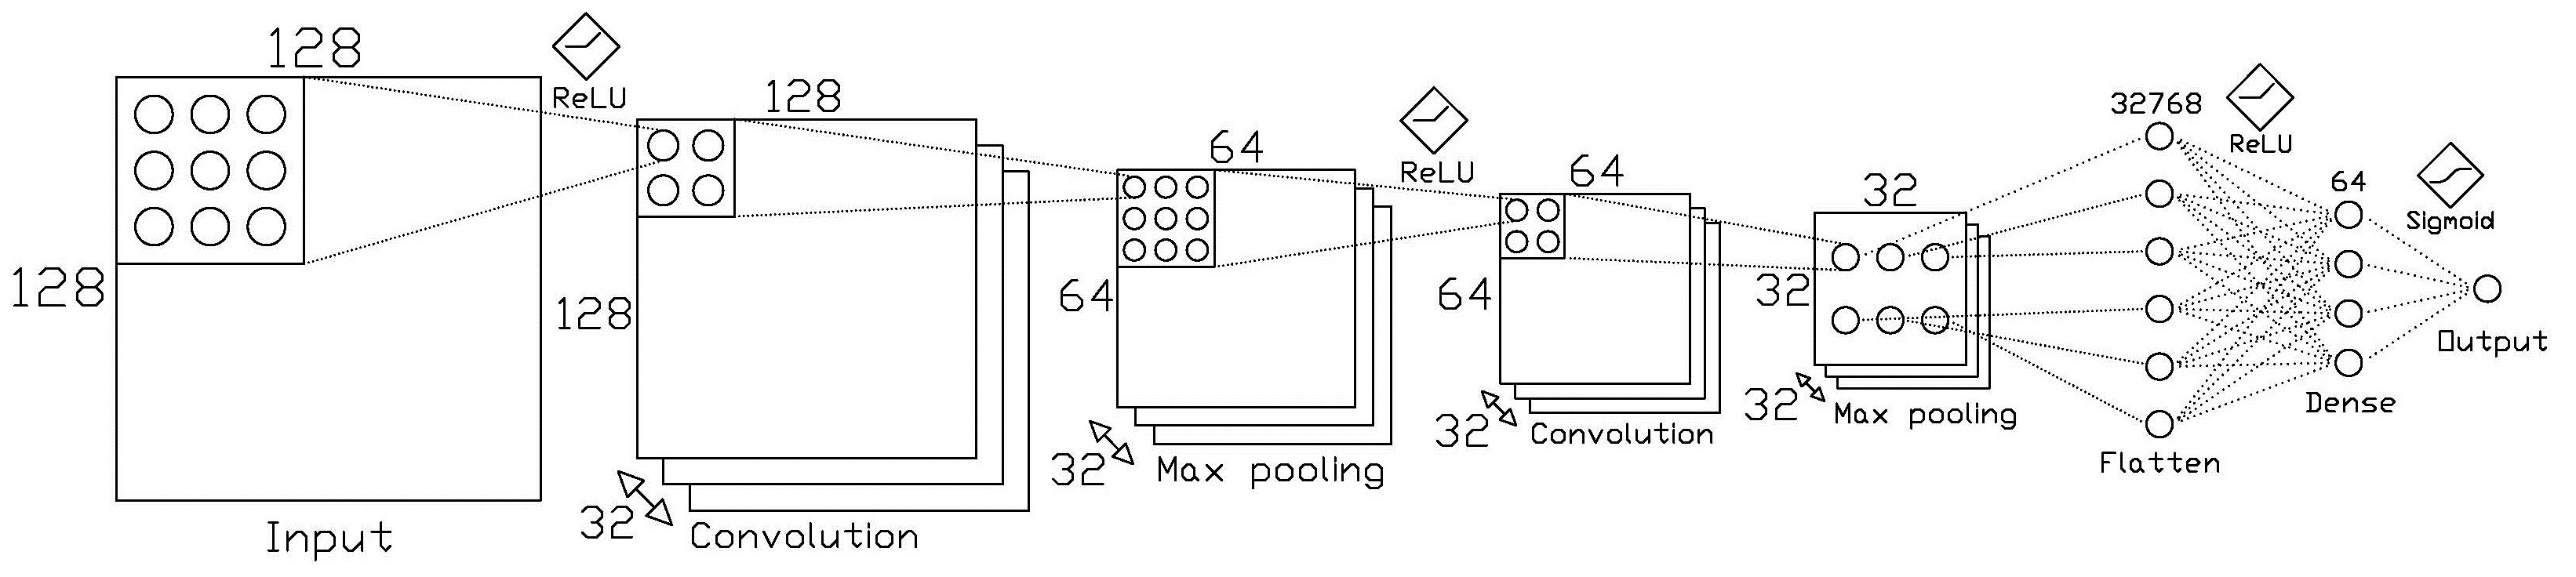

In [54]:
IPython.core.display.Image("Diagram.jpg", embed=True)

In [29]:
trainGen = keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255, shear_range = 0.3,
                                                         zoom_range = 0.3, horizontal_flip = True,
                                                         vertical_flip = True )
testGen = keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )

ImageDataGenerator: Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
* rescale: If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
* shear_range: Shear Intensity (Shear angle in counter-clockwise direction in degrees)
* zoom_range: Range for random zoom.
* horizontal_flip: Randomly flip inputs horizontally.
* vertical_flip: Randomly flip inputs vertically.

In [30]:
trainSet = trainGen.flow_from_directory('dataset/TrainDataset', target_size = (128, 128),
                                             batch_size = 32, class_mode = 'binary')
testSet = testGen.flow_from_directory('dataset/TestDataset', target_size = (128, 128),
                                             batch_size = 32, class_mode = 'binary')

Found 1620 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


flow_from_directory: Takes the path to a directory & generates batches of augmented data.
* directory: path to the target directory. It should contain one subdirectory per class.
* target_size: The dimensions to which all images found will be resized.
* batch_size: Size of the batches of data 
* Determines the type of label arrays that are returned:
 * "categorical" will be 2D one-hot encoded labels,
 * "binary" will be 1D binary labels, "sparse" will be 1D integer labels,
 * "input" will be images identical to input images (mainly used to work with autoencoders).
 * If None, no labels are returned

In [32]:
net.fit_generator(trainSet, steps_per_epoch = 200, epochs = 40, validation_data = testSet,
                  validation_steps = 20)

Epoch 1/40
200/200 [==============================] - 136s 682ms/step - loss: 0.6862 - val_loss: 0.6767
Epoch 2/40
200/200 [==============================] - 182s 908ms/step - loss: 0.6699 - val_loss: 0.6602
Epoch 3/40
200/200 [==============================] - 184s 919ms/step - loss: 0.6519 - val_loss: 0.6370
Epoch 4/40
200/200 [==============================] - 166s 830ms/step - loss: 0.6220 - val_loss: 0.6090
Epoch 5/40
200/200 [==============================] - 159s 797ms/step - loss: 0.6082 - val_loss: 0.6447
Epoch 6/40
200/200 [==============================] - 162s 808ms/step - loss: 0.5947 - val_loss: 0.6448
Epoch 7/40
200/200 [==============================] - 166s 830ms/step - loss: 0.5749 - val_loss: 0.5812
Epoch 8/40
200/200 [==============================] - 162s 809ms/step - loss: 0.5493 - val_loss: 0.6256
Epoch 9/40
200/200 [==============================] - 160s 799ms/step - loss: 0.5361 - val_loss: 0.5855
Epoch 10/40
200/200 [==============================] - 169s 846m

fit_generator: Trains the model on data generated batch-by-batch by a Python generator 
* generator: A generator or an instance of Sequence
* steps_per_epoch: Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch.
* epochs: Number of epochs to train the model. An epoch is an iteration over the entire data provided, as defined by steps_per_epoch. 
* validation_data: on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.
* validation_steps: Total number of steps (batches of samples) to yield from validation_data generator before stopping at the end of every epoch. 

In [38]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/SinglePrediction/cat_or_dog_1.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = net.predict(test_image)
# trainSet.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'dog'

In [37]:
net.save('model_complete.h5')